In [274]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import sklearn
     


In [275]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [276]:
df=pd.read_csv("D:\customer segment project\shopping_behavior_updated.csv")
     

In [277]:

df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.10,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.10,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.10,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.50,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.70,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [278]:

df.max()

Customer ID                       3900
Age                                 70
Gender                            Male
Item Purchased                 T-shirt
Category                     Outerwear
Purchase Amount (USD)              100
Location                       Wyoming
Size                                XL
Color                           Yellow
Season                          Winter
Review Rating                     5.00
Subscription Status                Yes
Shipping Type             Store Pickup
Discount Applied                   Yes
Promo Code Used                    Yes
Previous Purchases                  50
Payment Method                   Venmo
Frequency of Purchases          Weekly
dtype: object

In [279]:

df.min()

Customer ID                            1
Age                                   18
Gender                            Female
Item Purchased                  Backpack
Category                     Accessories
Purchase Amount (USD)                 20
Location                         Alabama
Size                                   L
Color                              Beige
Season                              Fall
Review Rating                       2.50
Subscription Status                   No
Shipping Type             2-Day Shipping
Discount Applied                      No
Promo Code Used                       No
Previous Purchases                     1
Payment Method             Bank Transfer
Frequency of Purchases          Annually
dtype: object

In [280]:

df.shape

(3900, 18)

In [281]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [282]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.00,3900.00,3900.00,3900.00,3900.00
mean,1950.50,44.07,59.76,3.75,25.35
std,1125.98,15.21,23.69,0.72,14.45
min,1.00,18.00,20.00,2.50,1.00
25%,975.75,31.00,39.00,3.10,13.00
50%,1950.50,44.00,60.00,3.70,25.00
75%,2925.25,57.00,81.00,4.40,38.00
max,3900.00,70.00,100.00,5.00,50.00


In [283]:
df.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [284]:
%pip install feature-engine

Note: you may need to restart the kernel to use updated packages.


In [285]:
from feature_engine.imputation import MeanMedianImputer
impute=MeanMedianImputer()
df=impute.fit_transform(df)

In [286]:

df.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [287]:
import plotly.express as px

fig = px.histogram(df, x='Purchase Amount (USD)', nbins=50, title='Distribution of Balance')
fig.show()

In [288]:
px.scatter(df, x='Purchase Amount (USD)', y='Item Purchased', color='Payment Method',
                  title='')

In [289]:
#Correlation Matrix
import plotly.figure_factory as ff
correlation_matrix = df.select_dtypes(include=['float64', 'int64']).corr()


fig = ff.create_annotated_heatmap(
    z=correlation_matrix.to_numpy(),
    x=list(correlation_matrix.columns),
    y=list(correlation_matrix.index),
    annotation_text=correlation_matrix.round(2).values,
    colorscale='Viridis',
)
fig.update_layout(title='Correlation Matrix')


In [290]:
#pairwise relationships
fig = px.scatter_matrix(df)
fig.update_layout(title='Pairwise Relationships')


In [291]:
#category-based distributions
px.box(df, x='Category', y='Item Purchased', points="all", title='')
     


In [292]:
fig = px.scatter(df, x='Item Purchased', y='Purchase Amount (USD)', color='Customer ID', title='Purchases vs Payments Segmentation by Tenure')
fig.show()

In [293]:
#frequency analysis of purchase
fig = px.bar(df, x='Item Purchased', y='Category', title='Purchases Frequency')
fig.show()

In [294]:
# 3d scatter plot
fig = px.scatter_3d(df, x='Purchase Amount (USD)', y='Age', z='Category', color='Frequency of Purchases')
fig.show()


In [295]:
# Parallel Coordinates Plot
fig = px.parallel_coordinates(df, color='Previous Purchases')
fig.show()

In [296]:
# Sunburst Chart for Purchase Categories
fig = px.sunburst(df, path=['Frequency of Purchases', 'Item Purchased', 'Gender'],title='Purchase Categories Sunburst Chart')
fig.show()

In [297]:
#preproceesing data:
#scaling
#dimention reduction
#outlier reduction

In [298]:
df=df.drop(['Customer ID'],axis=1) #dropping cust_id col

In [299]:
df=df.drop(['Gender'],axis=1) #dropping cust_id col

In [300]:

df.max()

Age                                 70
Item Purchased                 T-shirt
Category                     Outerwear
Purchase Amount (USD)              100
Location                       Wyoming
Size                                XL
Color                           Yellow
Season                          Winter
Review Rating                     5.00
Subscription Status                Yes
Shipping Type             Store Pickup
Discount Applied                   Yes
Promo Code Used                    Yes
Previous Purchases                  50
Payment Method                   Venmo
Frequency of Purchases          Weekly
dtype: object

In [301]:
#oulier handling
# from feature_engine.outliers import Winsorizer
# column = ['BALANCE', 'PURCHASES']
# out = Winsorizer(capping_method='gaussian', variables=column)
# df_out = out.fit_transform(df)

In [302]:
# px.box(df_out,x='TENURE',y='BALANCE')
# px.box(df_out,x='TENURE',y='PURCHASES')

In [303]:
from sklearn.preprocessing import StandardScaler
numeric_df = df.select_dtypes(include=['int64', 'float64'])

Scaler=StandardScaler()
scaled_df=Scaler.fit_transform(numeric_df)
     

In [304]:

scaled_df

array([[ 0.71891344, -0.28562864, -0.90758357, -0.78583067],
       [-1.64862924,  0.17885219, -0.90758357, -1.61655226],
       [ 0.39008807,  0.55888195, -0.90758357, -0.16278948],
       ...,
       [ 0.12702777, -1.13013923, -1.18686209, -0.09356268],
       [-0.00450238,  0.72778407,  0.06989124, -0.09356268],
       [ 0.52161822,  0.89668619, -0.90758357,  0.52947851]])

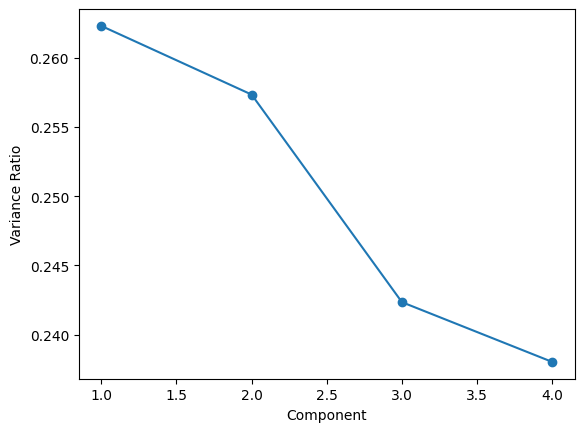

In [305]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(scaled_df)

plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.xlabel('Component')
plt.ylabel('Variance Ratio')
plt.show()

In [306]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
df_pca=pca.fit_transform(scaled_df)
df_pca=pd.DataFrame(data=df_pca,columns=['PCA1','PCA2']) #convrt to dataframe

In [307]:

df_pca

,PCA1,PCA2
0,0.68,-0.88
1,-1.41,-1.77
2,0.42,-0.11
3,-0.59,1.14
4,1.10,-0.71
...,...,...
3895,0.22,-0.26
3896,0.47,1.04
3897,1.05,-1.23
3898,-0.35,0.39


In [308]:

#elbow method for finding best k value
from sklearn.cluster import KMeans

In [309]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_pca)
    inertia.append(kmeans.inertia_)

In [310]:
px.line(x=range(1, 11), y=inertia,labels={'x': 'Clusters', 'y': 'Inertia'},markers=True)


In [311]:
from sklearn.cluster import KMeans
model=KMeans(n_clusters=4,verbose=1)
model.fit_predict(scaled_df)
     

Initialization complete
Iteration 0, inertia 12069.871957379311.
Iteration 1, inertia 9889.112235845516.
Iteration 2, inertia 9698.128574182396.
Iteration 3, inertia 9613.465444428553.
Iteration 4, inertia 9569.199803324029.
Iteration 5, inertia 9552.611537520303.
Iteration 6, inertia 9543.085162427682.
Iteration 7, inertia 9537.708267600961.
Iteration 8, inertia 9533.37491812646.
Iteration 9, inertia 9531.710482311388.
Iteration 10, inertia 9530.375743732702.
Iteration 11, inertia 9529.032316119446.
Iteration 12, inertia 9526.48977194971.
Iteration 13, inertia 9522.87501496764.
Iteration 14, inertia 9519.119575707133.
Iteration 15, inertia 9515.724566986748.
Iteration 16, inertia 9512.786517984552.
Iteration 17, inertia 9510.32421922822.
Iteration 18, inertia 9507.504009267477.
Iteration 19, inertia 9503.721379470157.
Iteration 20, inertia 9500.425241040793.
Iteration 21, inertia 9494.359405356907.
Iteration 22, inertia 9487.200434145645.
Iteration 23, inertia 9480.736975040421.
Itera

array([2, 2, 2, ..., 1, 2, 1], dtype=int32)

In [312]:
df_cluster=pd.concat([df_pca,pd.DataFrame({'cluster':model.labels_})],axis=1)


In [313]:
px.scatter(df_cluster, x='PCA1', y='PCA2', color='cluster',
                 title='Clusters Plot')

In [314]:
cluster_centers = pd.DataFrame(data=model.cluster_centers_,columns=['Category','Purchase Amount (USD)','Payment Method','Frequency of Purchases'
])


In [315]:
# reshaping into original value before scaling
cluster_centers = Scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data=cluster_centers,columns=['Category','Purchase Amount (USD)','Payment Method','Frequency of Purchases'])
cluster_df = pd.concat([df,pd.DataFrame({'Cluster':model.labels_})],axis=1)
cluster_df.to_csv("cluster_customer_data.csv")

In [316]:

cluster_df

,Age,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Cluster
0,55,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.10,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,2
1,19,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.10,Yes,Express,Yes,Yes,2,Cash,Fortnightly,2
2,50,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.10,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly,2
3,21,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.50,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly,3
4,45,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.70,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,40,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.20,No,2-Day Shipping,No,No,32,Venmo,Weekly,0
3896,52,Backpack,Accessories,49,Iowa,L,White,Spring,4.50,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly,3
3897,46,Belt,Accessories,33,New Jersey,L,Green,Spring,2.90,No,Standard,No,No,24,Venmo,Quarterly,1
3898,44,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.80,No,Express,No,No,24,Venmo,Weekly,2


In [317]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
X=cluster_df.drop(['Cluster'],axis=1)
y=cluster_df['Cluster']
     

In [318]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [319]:

pip install lazypredict

In [320]:
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(predictions=True)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
models

 97%|█████████▋| 30/31 [00:05<00:00,  5.50it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000226 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 388
[LightGBM] [Info] Number of data points in the train set: 3120, number of used features: 44
[LightGBM] [Info] Start training from score -1.445718
[LightGBM] [Info] Start training from score -1.308621
[LightGBM] [Info] Start training from score -1.381179
[LightGBM] [Info] Start training from score -1.414905


100%|██████████| 31/31 [00:05<00:00,  5.54it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LogisticRegression,0.98,0.98,None,0.98,0.11
LinearSVC,0.97,0.97,None,0.97,0.05
CalibratedClassifierCV,0.97,0.97,None,0.97,0.16
XGBClassifier,0.96,0.96,None,0.96,0.27
RidgeClassifierCV,0.96,0.96,None,0.96,0.04
LinearDiscriminantAnalysis,0.96,0.96,None,0.96,0.04
RidgeClassifier,0.96,0.96,None,0.96,0.03
LGBMClassifier,0.96,0.96,None,0.96,0.26
BaggingClassifier,0.95,0.95,None,0.95,0.13


In [321]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     3900 non-null   int64  
 1   Item Purchased          3900 non-null   object 
 2   Category                3900 non-null   object 
 3   Purchase Amount (USD)   3900 non-null   int64  
 4   Location                3900 non-null   object 
 5   Size                    3900 non-null   object 
 6   Color                   3900 non-null   object 
 7   Season                  3900 non-null   object 
 8   Review Rating           3900 non-null   float64
 9   Subscription Status     3900 non-null   object 
 10  Shipping Type           3900 non-null   object 
 11  Discount Applied        3900 non-null   object 
 12  Promo Code Used         3900 non-null   object 
 13  Previous Purchases      3900 non-null   int64  
 14  Payment Method          3900 non-null   

In [322]:
categorical_features = [
    'Item Purchased', 'Category', 'Location', 'Size', 'Color', 
    'Season', 'Subscription Status', 'Shipping Type', 
    'Discount Applied', 'Promo Code Used', 
    'Payment Method', 'Frequency of Purchases'
]
preprocessor = ColumnTransformer(
    transformers=[
        ('Handbag', OneHotEncoder(), categorical_features)
    ],
    remainder='passthrough'  # Keep the other columns as they are
)


In [323]:
from sklearn.metrics import accuracy_score,classification_report
from sklearn.linear_model import LogisticRegression
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(multi_class='multinomial', solver='lbfgs'))
])
pipeline.fit(X_train, y_train)
y_predict = pipeline.predict(X_test)

from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93       185
           1       0.93      0.94      0.93       200
           2       0.92      0.92      0.92       198
           3       0.89      0.85      0.87       197

    accuracy                           0.91       780
   macro avg       0.91      0.91      0.91       780
weighted avg       0.91      0.91      0.91       780



In [324]:
from sklearn.svm import SVC
svc=SVC( decision_function_shape='ovr')
# Fit the model
pipeline.fit(X_train, y_train)

# Make predictions
y_p = pipeline.predict(X_test)

print(classification_report(y_test,y_p))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93       185
           1       0.93      0.94      0.93       200
           2       0.92      0.92      0.92       198
           3       0.89      0.85      0.87       197

    accuracy                           0.91       780
   macro avg       0.91      0.91      0.91       780
weighted avg       0.91      0.91      0.91       780



In [325]:
from sklearn.ensemble import RandomForestClassifier
rc=RandomForestClassifier()
# Fit the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pr= pipeline.predict(X_test)

print(classification_report(y_test,y_pr))
     

              precision    recall  f1-score   support

           0       0.92      0.95      0.93       185
           1       0.93      0.94      0.93       200
           2       0.92      0.92      0.92       198
           3       0.89      0.85      0.87       197

    accuracy                           0.91       780
   macro avg       0.91      0.91      0.91       780
weighted avg       0.91      0.91      0.91       780



In [326]:
!pip install xgboost


In [327]:
pip install Google-Colab-Transfer

Note: you may need to restart the kernel to use updated packages.


In [328]:

filename ='kmeans_model.pkl'
import pickle
import joblib
# Assuming 'pipeline' is your trained model (e.g., a scikit-learn pipeline)
with open('kmeans_model.pkl', 'wb') as file:  # Open a file in write-binary mode
    pickle.dump(pipeline, file)  # Save the model to the file
   